Accuracy: 0.3


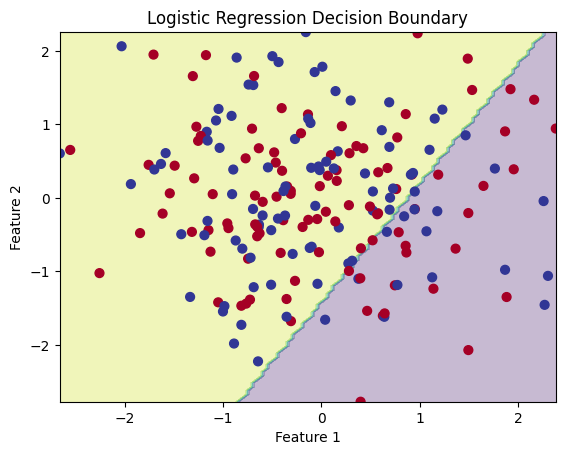

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

# Example usage with a synthetic dataset
if __name__ == "__main__":
    # Generating synthetic data
    np.random.seed(0)
    num_samples = 200
    X = np.random.randn(num_samples, 2)
    y = np.random.randint(0, 2, num_samples)

    # Splitting the data into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training the logistic regression model
    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Plotting decision boundary
    def plot_decision_boundary(X, y, model):
        x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        x2 = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
        xx1, xx2 = np.meshgrid(x1, x2)
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        pred = model.predict(grid)
        pred = np.array(pred).reshape(xx1.shape)
        plt.contourf(xx1, xx2, pred, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.title("Logistic Regression Decision Boundary")
        plt.show()

    plot_decision_boundary(X, y, model)
